# Machine Learning Engineer Nanodegree
## Reinforcement Learning
## Project: Train a Smartcab to Drive

Welcome to the fourth project of the Machine Learning Engineer Nanodegree! In this notebook, template code has already been provided for you to aid in your analysis of the *Smartcab* and your implemented learning algorithm. You will not need to modify the included code beyond what is requested. There will be questions that you must answer which relate to the project and the visualizations provided in the notebook. Each section where you will answer a question is preceded by a **'Question X'** header. Carefully read each question and provide thorough answers in the following text boxes that begin with **'Answer:'**. Your project submission will be evaluated based on your answers to each of the questions and the implementation you provide in `agent.py`.  

>**Note:** Code and Markdown cells can be executed using the **Shift + Enter** keyboard shortcut. In addition, Markdown cells can be edited by typically double-clicking the cell to enter edit mode.

-----

## Getting Started
In this project, you will work towards constructing an optimized Q-Learning driving agent that will navigate a *Smartcab* through its environment towards a goal. Since the *Smartcab* is expected to drive passengers from one location to another, the driving agent will be evaluated on two very important metrics: **Safety** and **Reliability**. A driving agent that gets the *Smartcab* to its destination while running red lights or narrowly avoiding accidents would be considered **unsafe**. Similarly, a driving agent that frequently fails to reach the destination in time would be considered **unreliable**. Maximizing the driving agent's **safety** and **reliability** would ensure that *Smartcabs* have a permanent place in the transportation industry.

**Safety** and **Reliability** are measured using a letter-grade system as follows:

| Grade 	| Safety 	| Reliability 	|
|:-----:	|:------:	|:-----------:	|
|   A+  	|  Agent commits no traffic violations,<br/>and always chooses the correct action. | Agent reaches the destination in time<br />for 100% of trips. |
|   A   	|  Agent commits few minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 90% of trips. |
|   B   	| Agent commits frequent minor traffic violations,<br/>such as failing to move on a green light. | Agent reaches the destination on time<br />for at least 80% of trips. |
|   C   	|  Agent commits at least one major traffic violation,<br/> such as driving through a red light. | Agent reaches the destination on time<br />for at least 70% of trips. |
|   D   	| Agent causes at least one minor accident,<br/> such as turning left on green with oncoming traffic.       	| Agent reaches the destination on time<br />for at least 60% of trips. |
|   F   	|  Agent causes at least one major accident,<br />such as driving through a red light with cross-traffic.      	| Agent fails to reach the destination on time<br />for at least 60% of trips. |

To assist evaluating these important metrics, you will need to load visualization code that will be used later on in the project. Run the code cell below to import this code which is required for your analysis.

In [2]:
# Import the visualization code
import visuals as vs

# Pretty display for notebooks
%matplotlib inline

### Understand the World
Before starting to work on implementing your driving agent, it's necessary to first understand the world (environment) which the *Smartcab* and driving agent work in. One of the major components to building a self-learning agent is understanding the characteristics about the agent, which includes how the agent operates. To begin, simply run the `agent.py` agent code exactly how it is -- no need to make any additions whatsoever. Let the resulting simulation run for some time to see the various working components. Note that in the visual simulation (if enabled), the **white vehicle** is the *Smartcab*.

### Question 1
In a few sentences, describe what you observe during the simulation when running the default `agent.py` agent code. Some things you could consider:
- *Does the Smartcab move at all during the simulation?*
- *What kind of rewards is the driving agent receiving?*
- *How does the light changing color affect the rewards?*  

**Hint:** From the `/smartcab/` top-level directory (where this notebook is located), run the command 
```bash
'python smartcab/agent.py'
```

**Answer:**
No the smartcab (white car) is not moving at all this point.
The agent is recieving positive rewards and negative rewards.
The agent is recieving positive rewards when the car is not moving in red light. But then it recieve negative rewards when the light is green and there is no incomming traffic. In any of these cases the white car is idel and not moving from its place.

### Understand the Code
In addition to understanding the world, it is also necessary to understand the code itself that governs how the world, simulation, and so on operate. Attempting to create a driving agent would be difficult without having at least explored the *"hidden"* devices that make everything work. In the `/smartcab/` top-level directory, there are two folders: `/logs/` (which will be used later) and `/smartcab/`. Open the `/smartcab/` folder and explore each Python file included, then answer the following question.

### Question 2
- *In the *`agent.py`* Python file, choose three flags that can be set and explain how they change the simulation.*
- *In the *`environment.py`* Python file, what Environment class function is called when an agent performs an action?*
- *In the *`simulator.py`* Python file, what is the difference between the *`'render_text()'`* function and the *`'render()'`* function?*
- *In the *`planner.py`* Python file, will the *`'next_waypoint()`* function consider the North-South or East-West direction first?*

**Answer:**

In Agent.py I picked the following three flags:
display: If this is set to true the pygame GUI will be enabled else it will be disabled.By default the value is set to true and if you have pygame installed, you should see the GUI when you run agent.py. So if we pass it like this, it will not show the pygame GUI window: sim = Simulator(env,display=False).

num_dummies: this is setting the number of cars in simulation. So if I want to see only 10 cars, I can set it to 10 like this: env = Environment(num_dummies=10)

grid_size: this will set the number of intersections (columns and rows). by default it is set to 8,6 and can be changed using this flag.

In environment.py, the the **act** method of enviroment class is the one that gets called when agent performs an action.

In the simulator.py, the difference between render_text and render funtion is: the render_text will render text in non-gui cmd lint terminal, where the render will display text in the GUI simulator.

In the planner.py, the next_waypoint() funciton considers East-West direction first.

-----
## Implement a Basic Driving Agent

The first step to creating an optimized Q-Learning driving agent is getting the agent to actually take valid actions. In this case, a valid action is one of `None`, (do nothing) `'left'` (turn left), `right'` (turn right), or `'forward'` (go forward). For your first implementation, navigate to the `'choose_action()'` agent function and make the driving agent randomly choose one of these actions. Note that you have access to several class variables that will help you write this functionality, such as `'self.learning'` and `'self.valid_actions'`. Once implemented, run the agent file and simulation briefly to confirm that your driving agent is taking a random action each time step.

### Basic Agent Simulation Results
To obtain results from the initial simulation, you will need to adjust following flags:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.

Optionally, you may disable to the visual simulation (which can make the trials go faster) by setting the `'display'` flag to `False`. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation!

Once you have successfully completed the initial simulation (there should have been 20 training trials and 10 testing trials), run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!
Run the agent.py file after setting the flags from projects/smartcab folder instead of projects/smartcab/smartcab.


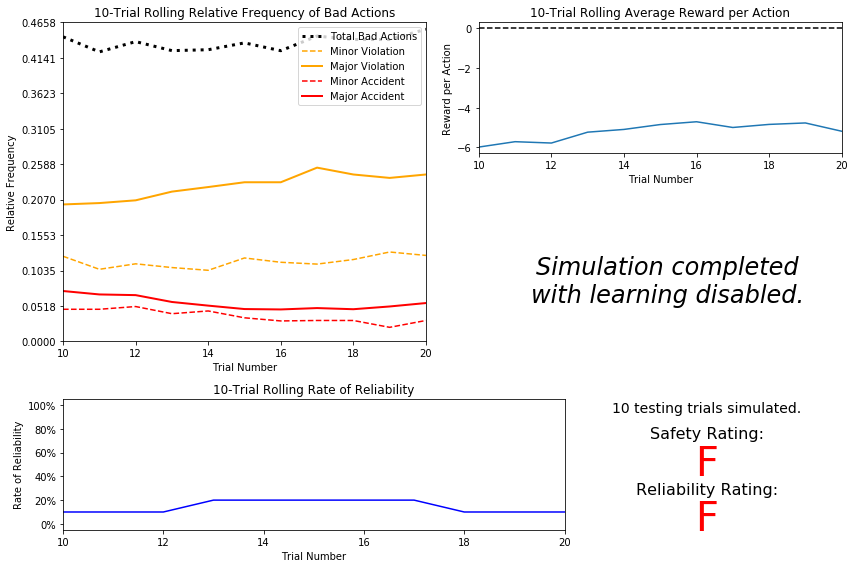

In [15]:
# Load the 'sim_no-learning' log file from the initial simulation results
vs.plot_trials('sim_no-learning.csv')

### Question 3
Using the visualization above that was produced from your initial simulation, provide an analysis and make several observations about the driving agent. Be sure that you are making at least one observation about each panel present in the visualization. Some things you could consider:
- *How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?*
- *Given that the agent is driving randomly, does the rate of reliability make sense?*
- *What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?*
- *As the number of trials increases, does the outcome of results change significantly?*
- *Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?*

**Answer:**
How frequently is the driving agent making bad decisions? How many of those bad decisions cause accidents?
Answer: about 40-45% of the time the agent is making bad decisions. about 5-7% or 7.5% of the decision caused accidents. but looking the solid red and top dotted black lines, the bad decision and accidents droped a little bit towards the end. 

Given that the agent is driving randomly, does the rate of reliability make sense?
Since it is driving randomly, the agent is arriving to desitination about 20% of the time and it makes sense since it takes random actions.

What kind of rewards is the agent receiving for its actions? Do the rewards suggest it has been penalized heavily?
Looking at the rewards, it aligns with the major accidents that started with more accidents and then it reduced some. So at the begining the reward is about -5.5 , but later it goes up as the number of of accidents decreases. It is not penalized heavily I think.

As the number of trials increases, does the outcome of results change significantly?
This is a random action trial so as the number of trials increase the outcome is not changing very significantly and that should be the expected behavior.

Would this Smartcab be considered safe and/or reliable for its passengers? Why or why not?
Of course not, when there is 45% chance of bad decision and about 7-8% accidents, then this is not  a safe car. As per table above for A+ to D, there should not be any accidents and at minimum the chance to getting to destination is 60% where for this car it is only up to 20% and at most maybe 25%.



-----
## Inform the Driving Agent
The second step to creating an optimized Q-learning driving agent is defining a set of states that the agent can occupy in the environment. Depending on the input, sensory data, and additional variables available to the driving agent, a set of states can be defined for the agent so that it can eventually *learn* what action it should take when occupying a state. The condition of `'if state then action'` for each state is called a **policy**, and is ultimately what the driving agent is expected to learn. Without defining states, the driving agent would never understand which action is most optimal -- or even what environmental variables and conditions it cares about!

### Identify States
Inspecting the `'build_state()'` agent function shows that the driving agent is given the following data from the environment:
- `'waypoint'`, which is the direction the *Smartcab* should drive leading to the destination, relative to the *Smartcab*'s heading.
- `'inputs'`, which is the sensor data from the *Smartcab*. It includes 
  - `'light'`, the color of the light.
  - `'left'`, the intended direction of travel for a vehicle to the *Smartcab*'s left. Returns `None` if no vehicle is present.
  - `'right'`, the intended direction of travel for a vehicle to the *Smartcab*'s right. Returns `None` if no vehicle is present.
  - `'oncoming'`, the intended direction of travel for a vehicle across the intersection from the *Smartcab*. Returns `None` if no vehicle is present.
- `'deadline'`, which is the number of actions remaining for the *Smartcab* to reach the destination before running out of time.

### Question 4
*Which features available to the agent are most relevant for learning both **safety** and **efficiency**? Why are these features appropriate for modeling the *Smartcab* in the environment? If you did not choose some features, why are those features* not *appropriate? Please note that whatever features you eventually choose for your agent's state, must be argued for here. That is: your code in agent.py should reflect the features chosen in this answer.
*

NOTE: You are not allowed to engineer new features for the smartcab. 

**Answer:**


**AFTER REVIEW**
Justification for right: 
if the light is red and the agent wants to make a right turn, having the other car in right lane does not impact/change anything. Also if light is red and there is an agent in right the smartcab  should not move forward or left anyway so that right information does not add anything to the training info for smartcab.


Input:left is I think important because when there is an agent in left and if the smartcab is making a right turn, then there could be a major accident. For this reason I think keeping left is a good idea.


**END OF AFTER REVIEW**

**For Safety** I think inputs is an important feature. Specially inputs-light is the most important feature. The car should stop on red light to reach safety goal. other features of input such as left,right and oncoming is also important because that will tell/train the cab which direction to move to avoid collisions. I don't see much use in the input[right] and I will remove this one from my states.

**For efficiency** it is important to know what direction to choose which is given by waypoint. So I think waypoint is the most important feature for effeciently reaching the destination. 

I don't see how deadline can help the cab in terms of learning, so I think this is not for learning purpose since it is mostly related to rewards and not learning.

### Define a State Space
When defining a set of states that the agent can occupy, it is necessary to consider the *size* of the state space. That is to say, if you expect the driving agent to learn a **policy** for each state, you would need to have an optimal action for *every* state the agent can occupy. If the number of all possible states is very large, it might be the case that the driving agent never learns what to do in some states, which can lead to uninformed decisions. For example, consider a case where the following features are used to define the state of the *Smartcab*:

`('is_raining', 'is_foggy', 'is_red_light', 'turn_left', 'no_traffic', 'previous_turn_left', 'time_of_day')`.

How frequently would the agent occupy a state like `(False, True, True, True, False, False, '3AM')`? Without a near-infinite amount of time for training, it's doubtful the agent would ever learn the proper action!

### Question 5
*If a state is defined using the features you've selected from **Question 4**, what would be the size of the state space? Given what you know about the environment and how it is simulated, do you think the driving agent could learn a policy for each possible state within a reasonable number of training trials?*  
**Hint:** Consider the *combinations* of features to calculate the total number of states!

**Answer:** So here are some numbers related to each of the features:

**AFTER REVIEW**
1. Waypoint has 3 states: forward, left, right
2. Inputs has 4 featues in it 

    a. input-light has 2 states which is green and red
      
    c. input-left  : there are 4 different ways for left to be from picked, right, forward, none
    
    d. input- oncomming  : there are 4 different ways for oncomming 
    
 
 As we can see the total is 3x2x4x4 = 96 when we don't keep input:right 

**END OF AFTER REVIEW**


1. Waypoint has 3 states: forward, left, right
2. Inputs has 4 featues in it 

    a. input-light has 2 states which is green and red
    
    b. input-right : there are 4 different ways for right to be from picked, right, forward, none
    
    c. input-left  : there are 4 different ways for left to be from picked, right, forward, none
    
    d. input- oncomming  : there are 4 different ways for oncomming 
    
 
 As we can see the total is 3x2x4x4x4 = 384 and I don

### Update the Driving Agent State
For your second implementation, navigate to the `'build_state()'` agent function. With the justification you've provided in **Question 4**, you will now set the `'state'` variable to a tuple of all the features necessary for Q-Learning. Confirm your driving agent is updating its state by running the agent file and simulation briefly and note whether the state is displaying. If the visual simulation is used, confirm that the updated state corresponds with what is seen in the simulation.

**Note:** Remember to reset simulation flags to their default setting when making this observation!

-----
## Implement a Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to begin implementing the functionality of Q-Learning itself. The concept of Q-Learning is fairly straightforward: For every state the agent visits, create an entry in the Q-table for all state-action pairs available. Then, when the agent encounters a state and performs an action, update the Q-value associated with that state-action pair based on the reward received and the iterative update rule implemented. Of course, additional benefits come from Q-Learning, such that we can have the agent choose the *best* action for each state based on the Q-values of each state-action pair possible. For this project, you will be implementing a *decaying,* $\epsilon$*-greedy* Q-learning algorithm with *no* discount factor. Follow the implementation instructions under each **TODO** in the agent functions.

Note that the agent attribute `self.Q` is a dictionary: This is how the Q-table will be formed. Each state will be a key of the `self.Q` dictionary, and each value will then be another dictionary that holds the *action* and *Q-value*. Here is an example:

```
{ 'state-1': { 
    'action-1' : Qvalue-1,
    'action-2' : Qvalue-2,
     ...
   },
  'state-2': {
    'action-1' : Qvalue-1,
     ...
   },
   ...
}
```

Furthermore, note that you are expected to use a *decaying* $\epsilon$ *(exploration) factor*. Hence, as the number of trials increases, $\epsilon$ should decrease towards 0. This is because the agent is expected to learn from its behavior and begin acting on its learned behavior. Additionally, The agent will be tested on what it has learned after $\epsilon$ has passed a certain threshold (the default threshold is 0.05). For the initial Q-Learning implementation, you will be implementing a linear decaying function for $\epsilon$.

### Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'n_test'` - Set this to `'10'` to perform 10 testing trials.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.

In addition, use the following decay function for $\epsilon$:

$$ \epsilon_{t+1} = \epsilon_{t} - 0.05, \hspace{10px}\textrm{for trial number } t$$

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the initial Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

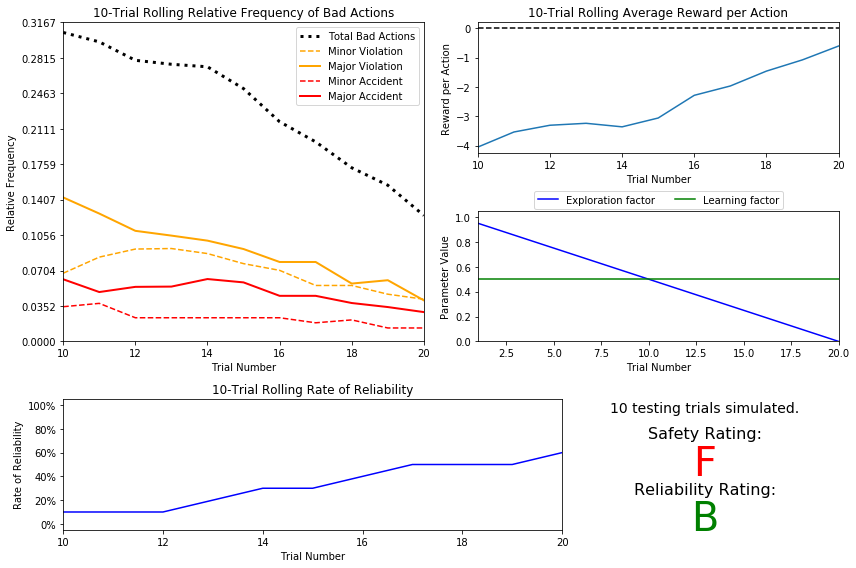

In [38]:
# Load the 'sim_default-learning' file from the default Q-Learning simulation
vs.plot_trials('sim_default-learning.csv')

### Question 6
Using the visualization above that was produced from your default Q-Learning simulation, provide an analysis and make observations about the driving agent like in **Question 3**. Note that the simulation should have also produced the Q-table in a text file which can help you make observations about the agent's learning. Some additional things you could consider:  
- *Are there any observations that are similar between the basic driving agent and the default Q-Learning agent?*
**The observations changed from original since it is learning now and the only thing exactly same is very low safety rating of F. It still shows about 3% of major accidentsand about 14% of time it takes bad action.**
- *Approximately how many training trials did the driving agent require before testing? Does that number make sense given the epsilon-tolerance?*
**It did ran 20 trials and that made since because we had initial value of epsilon to 1 and then we set epsilon = epsilon - 0.05 and that will reach to 0.0 when it runs 20 times. So the trial value is 20**
- *Is the decaying function you implemented for $\epsilon$ (the exploration factor) accurately represented in the parameters panel?*
**yes I used the decaying funciton given for this and its looking correct with -0.05 slope for exploration funciton funciton. also our alpha line which was a constant of 0.5 is the green line there.**
- *As the number of training trials increased, did the number of bad actions decrease? Did the average reward increase?*
**Yes as you can see in the first plot on the right as the training trail increased, the bad actions decreased from 30% to almost 15%. and as the rewards graph shows the number of rewards increased from -4 to about -0.5**
- *How does the safety and reliability rating compare to the initial driving agent?*
**So the rating for Safety still stayed the same as no learning case which was F, but my reliability improved by learning from F to B which is a good improvemtn. But I should say since our Saftey is still at F this means it is still not performing good enough and will not pass since we have major accidents about 3.5% of the time.**

**Answer:** Answers are after each question above.

-----
## Improve the Q-Learning Driving Agent
The third step to creating an optimized Q-Learning agent is to perform the optimization! Now that the Q-Learning algorithm is implemented and the driving agent is successfully learning, it's necessary to tune settings and adjust learning paramaters so the driving agent learns both **safety** and **efficiency**. Typically this step will require a lot of trial and error, as some settings will invariably make the learning worse. One thing to keep in mind is the act of learning itself and the time that this takes: In theory, we could allow the agent to learn for an incredibly long amount of time; however, another goal of Q-Learning is to *transition from experimenting with unlearned behavior to acting on learned behavior*. For example, always allowing the agent to perform a random action during training (if $\epsilon = 1$ and never decays) will certainly make it *learn*, but never let it *act*. When improving on your Q-Learning implementation, consider the implications it creates and whether it is logistically sensible to make a particular adjustment.

### Improved Q-Learning Simulation Results
To obtain results from the initial Q-Learning implementation, you will need to adjust the following flags and setup:
- `'enforce_deadline'` - Set this to `True` to force the driving agent to capture whether it reaches the destination in time.
- `'update_delay'` - Set this to a small value (such as `0.01`) to reduce the time between steps in each trial.
- `'log_metrics'` - Set this to `True` to log the simluation results as a `.csv` file and the Q-table as a `.txt` file in `/logs/`.
- `'learning'` - Set this to `'True'` to tell the driving agent to use your Q-Learning implementation.
- `'optimized'` - Set this to `'True'` to tell the driving agent you are performing an optimized version of the Q-Learning implementation.

Additional flags that can be adjusted as part of optimizing the Q-Learning agent:
- `'n_test'` - Set this to some positive number (previously 10) to perform that many testing trials.
- `'alpha'` - Set this to a real number between 0 - 1 to adjust the learning rate of the Q-Learning algorithm.
- `'epsilon'` - Set this to a real number between 0 - 1 to adjust the starting exploration factor of the Q-Learning algorithm.
- `'tolerance'` - set this to some small value larger than 0 (default was 0.05) to set the epsilon threshold for testing.

Furthermore, use a decaying function of your choice for $\epsilon$ (the exploration factor). Note that whichever function you use, it **must decay to **`'tolerance'`** at a reasonable rate**. The Q-Learning agent will not begin testing until this occurs. Some example decaying functions (for $t$, the number of trials):

$$ \epsilon = a^t, \textrm{for } 0 < a < 1 \hspace{50px}\epsilon = \frac{1}{t^2}\hspace{50px}\epsilon = e^{-at}, \textrm{for } 0 < a < 1 \hspace{50px} \epsilon = \cos(at), \textrm{for } 0 < a < 1$$
You may also use a decaying function for $\alpha$ (the learning rate) if you so choose, however this is typically less common. If you do so, be sure that it adheres to the inequality $0 \leq \alpha \leq 1$.

If you have difficulty getting your implementation to work, try setting the `'verbose'` flag to `True` to help debug. Flags that have been set here should be returned to their default setting when debugging. It is important that you understand what each flag does and how it affects the simulation! 

Once you have successfully completed the improved Q-Learning simulation, run the code cell below to visualize the results. Note that log files are overwritten when identical simulations are run, so be careful with what log file is being loaded!

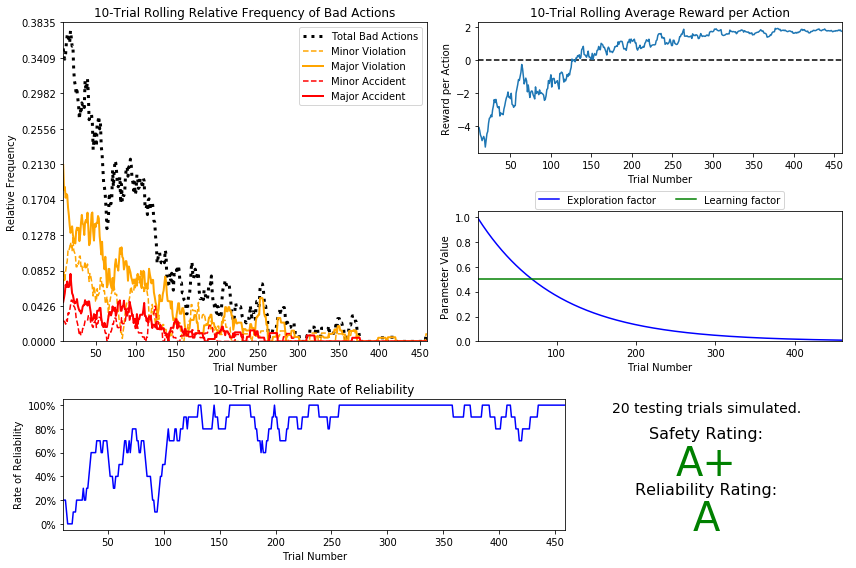

In [6]:
# Load the 'sim_improved-learning' file from the improved Q-Learning simulation
vs.plot_trials('sim_improved-learning.csv')

### Question 7
**AFTER REVIEW** I tried to optimize the model more by changing the epsilon value function. The smaller I made the coeffecient for epsilon in that funciton (ep = ep = ep * coef) the better my model became. So I will not touch it any more and i got double A which is super with that coef value set to 0.01.

**END OF AFTER REVIEW**







Using the visualization above that was produced from your improved Q-Learning simulation, provide a final analysis and make observations about the improved driving agent like in **Question 6**. Questions you should answer:  
- *What decaying function was used for epsilon (the exploration factor)?*

**I tried many of the above decay functions, but I did not get an optimal result which will pass both. So I thought anything that will give me more trails may help the training so I tried epsilon= epsilon - epsilon x 0.05. I tried different numbers to multiply but this give about 90 training trials and worked well**

- *Approximately how many training trials were needed for your agent before begining testing?*
**I would say 90 was what it did in my case, but maybe around 70 would have worked too. **

- *What epsilon-tolerance and alpha (learning rate) did you use? Why did you use them?*

** I picked tolerance value of 0.01 and alpha of 0.5 which was from begining. I actually just tuned the value of toleerance to give me a better performance and then I stoped changing more. **

- *How much improvement was made with this Q-Learner when compared to the default Q-Learner from the previous section?

** There is a huge improvement compared to before. First my Safety Rating is A+ now which means the agent is not making any traffic violations and always took the correct action. My Safety rating improved from F to A+ and the Reliability rating is almost same as earlier which was already good and that was  a B which is the agent will reach distination 80% of the time.**

- *Would you say that the Q-Learner results show that your driving agent successfully learned an appropriate policy?*

** Yes I think that Q-Learner results shows that my agent learned the right polic. But I would like to say this is for this project and for a real life agent I would say we will try even a small value than 0.05 in my decay funciton(epsilon= epsilon - epsilon x 0.05) to give me more trials and that may improve the performance much more. Since I tried so many different decay functions and values, I would stick with what I have for this project. But the more training trail the smartcab gets, it may perform even better than this.**

- *Are you satisfied with the safety and reliability ratings of the *Smartcab*?*

**I am totaly satisfied with the safety of this car, but for reliability it is lower than what is highly reliable but it is still a good percentage of time that it will reach the distination. Even human drivers make mistakes to get some destination so maybe increasing number of training trails would improve this too.**

**Answer:** All the answers are above under each question

### Define an Optimal Policy

Sometimes, the answer to the important question *"what am I trying to get my agent to learn?"* only has a theoretical answer and cannot be concretely described. Here, however, you can concretely define what it is the agent is trying to learn, and that is the U.S. right-of-way traffic laws. Since these laws are known information, you can further define, for each state the *Smartcab* is occupying, the optimal action for the driving agent based on these laws. In that case, we call the set of optimal state-action pairs an **optimal policy**. Hence, unlike some theoretical answers, it is clear whether the agent is acting "incorrectly" not only by the reward (penalty) it receives, but also by pure observation. If the agent drives through a red light, we both see it receive a negative reward but also know that it is not the correct behavior. This can be used to your advantage for verifying whether the **policy** your driving agent has learned is the correct one, or if it is a **suboptimal policy**.

### Question 8

1. Please summarize what the optimal policy is for the smartcab in the given environment. What would be the best set of instructions possible given what we know about the environment? 
   _You can explain with words or a table, but you should thoroughly discuss the optimal policy._

2. Next, investigate the `'sim_improved-learning.txt'` text file to see the results of your improved Q-Learning algorithm. _For each state that has been recorded from the simulation, is the **policy** (the action with the highest value) correct for the given state? Are there any states where the policy is different than what would be expected from an optimal policy?_ 

3. Provide a few examples from your recorded Q-table which demonstrate that your smartcab learned the optimal policy. Explain why these entries demonstrate the optimal policy.

4. Try to find at least one entry where the smartcab did _not_ learn the optimal policy.  Discuss why your cab may have not learned the correct policy for the given state.

Be sure to document your `state` dictionary below, it should be easy for the reader to understand what each state represents.

**Answer:** 
**AFTER REVIEW**
this is one that found for a suboptimal policy the agent might have learned:

('forward', 'red', 'left', 'right')
 -- forward : 0.00
 -- right : -0.43
 -- None : 1.85
 -- left : 0.00
 
 Here if the agent is truning left in red light it can cause accident and violation where left turn Q value is better than right turn.
 
 ('right', 'green', 'forward', None)
 -- forward : 0.72
 -- right : 0.62
 -- None : -4.59
 -- left : -17.33

Even if waypoint is right, the agent may go forward to get that higher reward of .72 compared to right which is .62 and that  which will cause the efficiency of the agen to go a little lower.


**END OF AFTER REVIEW**




**1 OPTIMAL POLICY:** So below is the optimal policy that I can think of:

    - if waypoint is left, light is green and oncomming traffice is left or there is not oncomming traffice, then go left.If light is red, then it should wait else just go forward.
    - if waypoint is right, light is green, car coming from left then agent should do nothing and wait otherwise it should go right
    - if waypoint is forward and light is green then it should just go forward, else it should wait and do nothing. if the oncomming is not left, then it can go right.
  
**2 and 3. sim_improved-learning.txt Examples which follows the policy: **

    1. ('forward', 'green', 'forward', None)
         -- forward : 0.00
         -- right : 0.97
         -- None : 0.00
         -- left : -10.19
         in the above example waypoint is forward and light is green and oncomming traffic is also forward so in this case optimal policy is either go forward, or do nothing or better go right.
     
     2. ('right', 'green', 'forward', None)
         -- forward : 0.00
         -- right : 1.77
         -- None : -2.47
         -- left : -9.60 
         In this example the waypoint is right and light is green so the optimal policy is to go right or turn right. Where oncomming is forward and if it makes a left it will be highly punished. Also because light is green it should not wait(none).
     
     3. ('left', 'green', 'forward', 'forward')
         -- forward : 1.19
         -- right : 0.00
         -- None : -2.56
         -- left : -15.22
         Here the waypoint is left and green light and there is oncomming forward so if it moves left it will be highly  punished. Since light is green if it is not moving it will be punished. in this light if it moves forward or right it should be fine.
         
**NOT OPTIMAL POLICY** 
        1. ('right', 'red', None, 'left')
            -- forward : -8.32
            -- right : 1.85
            -- None : 0.00
            -- left : 0.00
     
     I would think this is not optimal, where the waypoint is right and light is red. IF the agent goes right it should be ok, but left and forward in red light should have punishment. So I think this is not completely optimal one. I See punishment for forward but not for left in red light.
     
     

-----
### Optional: Future Rewards - Discount Factor, `'gamma'`
Curiously, as part of the Q-Learning algorithm, you were asked to **not** use the discount factor, `'gamma'` in the implementation. Including future rewards in the algorithm is used to aid in propagating positive rewards backwards from a future state to the current state. Essentially, if the driving agent is given the option to make several actions to arrive at different states, including future rewards will bias the agent towards states that could provide even more rewards. An example of this would be the driving agent moving towards a goal: With all actions and rewards equal, moving towards the goal would theoretically yield better rewards if there is an additional reward for reaching the goal. However, even though in this project, the driving agent is trying to reach a destination in the allotted time, including future rewards will not benefit the agent. In fact, if the agent were given many trials to learn, it could negatively affect Q-values!

### Optional Question 9
*There are two characteristics about the project that invalidate the use of future rewards in the Q-Learning algorithm. One characteristic has to do with the *Smartcab* itself, and the other has to do with the environment. Can you figure out what they are and why future rewards won't work for this project?*



**Answer:** At this time I can only think of one thing about the smartcab that may invalidate use of future reward and that is that the car is learning as it is training so it is mostly based on the current learning and reward and future reward may not have to do anything with its learning.

> **Note**: Once you have completed all of the code implementations and successfully answered each question above, you may finalize your work by exporting the iPython Notebook as an HTML document. You can do this by using the menu above and navigating to  
**File -> Download as -> HTML (.html)**. Include the finished document along with this notebook as your submission.